import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import warnings

!pip install tensorflow
!pip install tensorflow_addons
sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import warnings

!pip install --upgrade tensorflow==2.12.0
!pip install --upgrade tensorflow-addons==0.21.0
!pip install keras==2.12.0
sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [2]:
!gdown --id 1xQKBWxgFZdRz0dvq0Mzdv-pIp0GtZH-O
og_data = pd.read_csv('input.csv')
og_data.info()
og_data.head()

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xQKBWxgFZdRz0dvq0Mzdv-pIp0GtZH-O
To: /content/input.csv
100% 46.5k/46.5k [00:00<00:00, 4.07MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [3]:
#data preprocessing
data = og_data.drop(columns=['sample_id', 'patient_cohort', 'sample_origin', 'stage', 'benign_sample_diagnosis'])
data.head(10)
data.replace({'sex': {'M': 1, 'F': 0}}, inplace=True)
data.head(10)
data['plasma_CA19_9'] = data['plasma_CA19_9'].interpolate(method='polynomial', order=2)
data['REG1A'] = data['REG1A'].interpolate(method='polynomial', order=2)
data.info()
X = data.loc[:, data.columns != 'diagnosis'].to_numpy()
y = data['diagnosis'].to_numpy()
X.shape, y.shape
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size = 0.2, random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            590 non-null    int64  
 1   sex            590 non-null    int64  
 2   diagnosis      590 non-null    int64  
 3   plasma_CA19_9  590 non-null    float64
 4   creatinine     590 non-null    float64
 5   LYVE1          590 non-null    float64
 6   REG1B          590 non-null    float64
 7   TFF1           590 non-null    float64
 8   REG1A          590 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 41.6 KB


array([[-6.60594114e-01, -9.42337519e-01, -1.86294560e-01, ...,
        -4.63872971e-01, -4.07503170e-01, -1.41147536e-01],
       [-1.36056034e-01,  1.06119090e+00, -1.04270474e-01, ...,
        -5.02539472e-01,  9.90995251e-02, -1.75694340e-01],
       [-4.35792080e-01, -9.42337519e-01,  2.82361446e-02, ...,
        -4.33380556e-01, -1.07776307e-01, -1.21985787e-01],
       ...,
       [-1.40993423e+00,  1.06119090e+00, -1.84694157e-01, ...,
         7.49886973e-02, -2.54014377e-01,  1.80955852e+00],
       [ 1.13782216e+00, -9.42337519e-01, -1.87127227e-01, ...,
        -4.52335520e-01, -4.46042655e-01,  3.92698967e-01],
       [-4.35792080e-01,  1.06119090e+00,  6.06665472e+00, ...,
        -1.23983868e-02, -1.64866375e-01, -5.37506706e-03]])

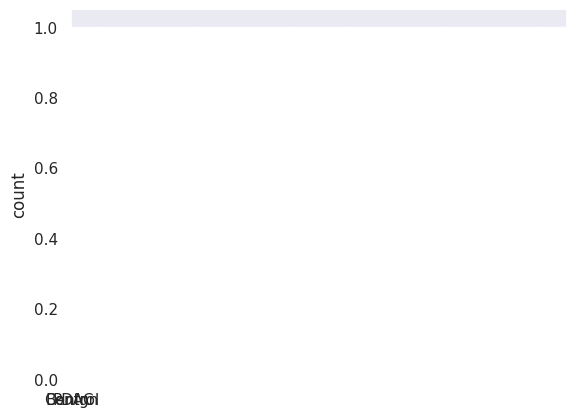

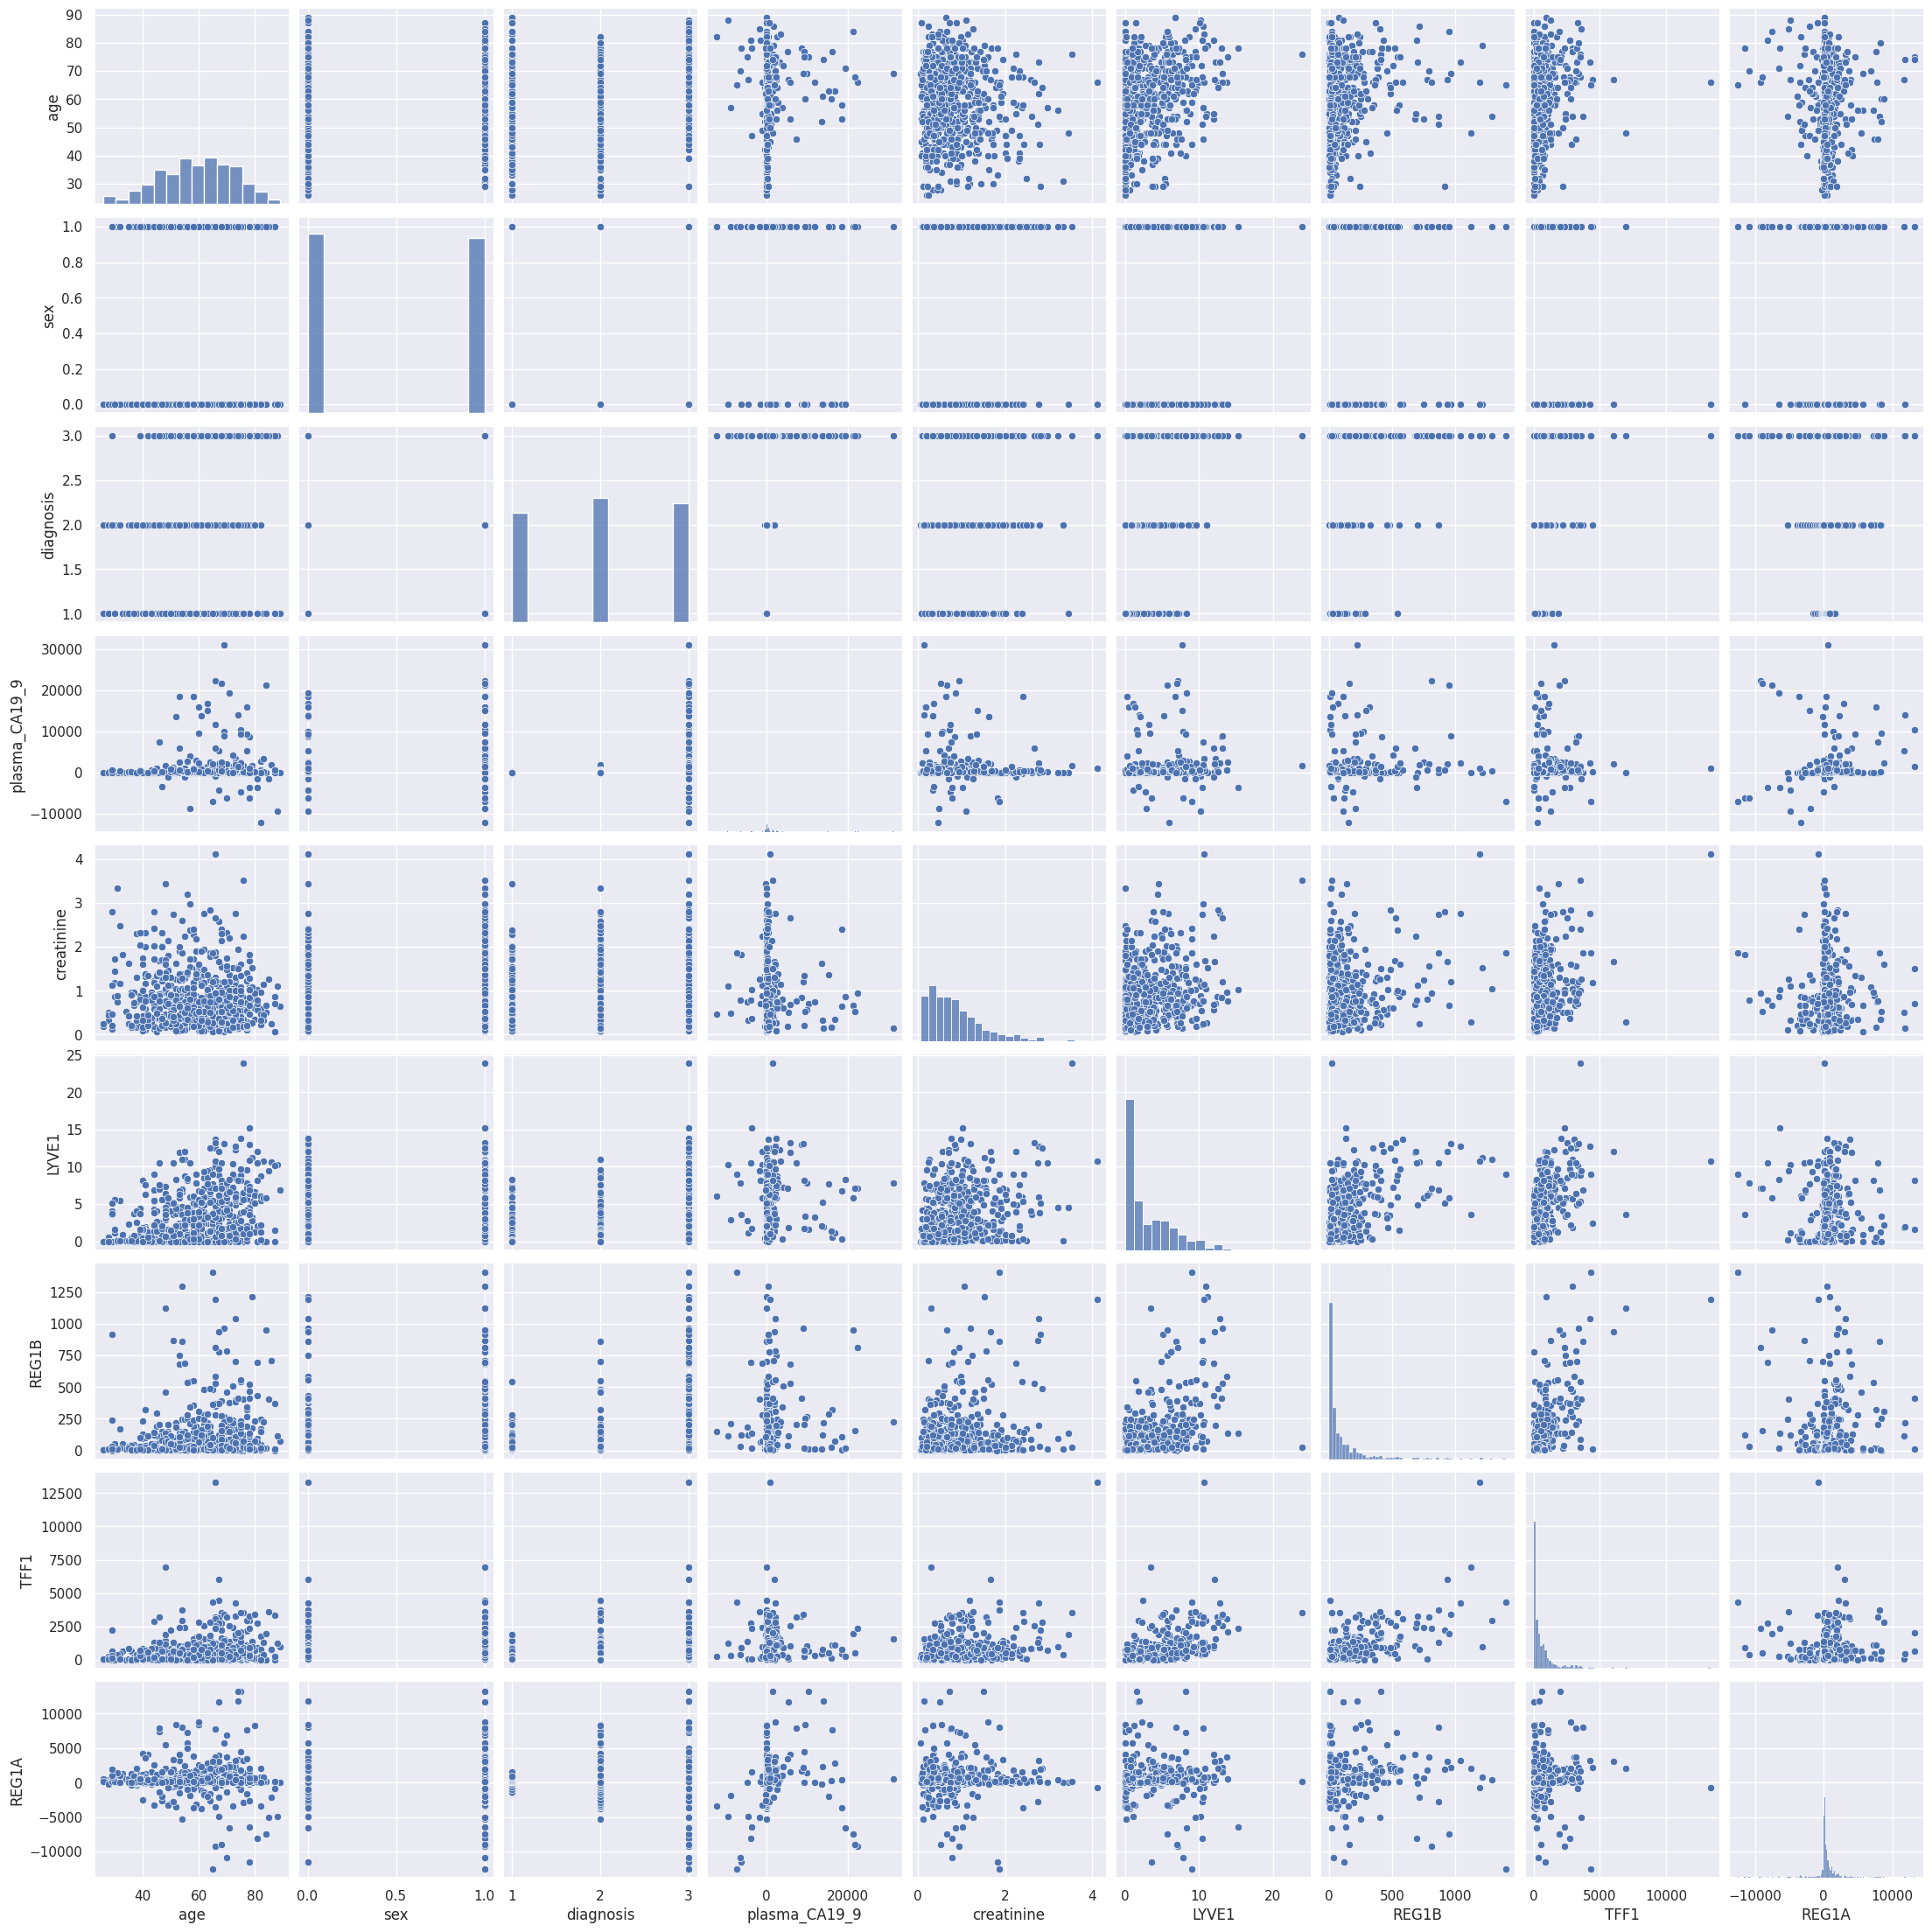

In [4]:
#visualizations
sns.countplot(y)
plt.xticks([0,1,2], labels=['Control', 'Benign', 'PDAC'])
plt.show()
sns.pairplot(data)
plt.show()

In [5]:
#building the model
from tensorflow.keras.layers import Conv1D,MaxPool1D,Dense,Dropout,BatchNormalization,Flatten
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad,SGD
from keras.optimizers import SGD

import tensorflow_addons as tfa

from tensorflow.keras import layers
metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.RootMeanSquaredError(),
           tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.AUC(curve='ROC'),tfa.metrics.F1Score(num_classes=3),
           tf.keras.metrics.AUC(curve='PR')]


In [6]:
# Part 2 - Building
cnn = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
cnn.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Adding the second hidden layer
# cnn.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
cnn.add(Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
cnn.add(Dropout(0.5))

# Adding the output layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [10]:
# Part 3 - Training the cNN

opt = Adam(lr=0.001)
# Compiling the ANN
cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics =metrics)

# Training the ANN on the Training set
history_cnn = cnn.fit(X_std, y_train,
          batch_size=8, epochs=100,
          validation_data=(X_test_std, y_test))

Epoch 1/100
59/59 [==============================] - 3s 27ms/step - loss: 0.7799 - accuracy: 0.6165 - precision: 0.7039 - recall: 0.4593 - root_mean_squared_error: 0.3968 - mean_absolute_percentage_error: 159435648.0000 - mean_absolute_error: 0.3189 - auc: 0.8215 - f1_score: 0.5815 - auc_1: 0.6988 - val_loss: 0.7183 - val_accuracy: 0.6017 - val_precision: 0.7143 - val_recall: 0.5085 - val_root_mean_squared_error: 0.3873 - val_mean_absolute_percentage_error: 152558032.0000 - val_mean_absolute_error: 0.3051 - val_auc: 0.8373 - val_f1_score: 0.5809 - val_auc_1: 0.7431
Epoch 2/100
59/59 [==============================] - 0s 8ms/step - loss: 0.7896 - accuracy: 0.6314 - precision: 0.7313 - recall: 0.4153 - root_mean_squared_error: 0.4013 - mean_absolute_percentage_error: 162460512.0000 - mean_absolute_error: 0.3249 - auc: 0.8165 - f1_score: 0.6080 - auc_1: 0.6905 - val_loss: 0.7152 - val_accuracy: 0.6102 - val_precision: 0.7093 - val_recall: 0.5169 - val_root_mean_squared_error: 0.3867 - val

In [12]:
# Part 4 - Making the predictions and evaluating the model

# Predicting the result of a single observation
X_train_std = X_std.reshape(X_std.shape[0],X_std.shape[1],1)
X_test_std = X_test_std.reshape(X_test_std.shape[0],X_test_std.shape[1],1)
X_train_std[0].shape
def create_model():
    model1 = Sequential()
    model1.add(Conv1D(16, 1,activation='relu',input_shape=(X_train_std[0].shape)))
    model1.add(Conv1D(8, 1, activation='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.3))


    model1.add(Conv1D(10, 1, activation='relu'))
    '''
    model1.add(BatchNormalization())
    model1.add(Dropout(0.3))
    '''

    model1.add(Flatten())
    model1.add(Dense(80, activation='relu'))
    model1.add(Dense(120, activation='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(30, activation='relu'))
    model1.add(Dense(3,activation = 'softmax'))

    return model1
model1 = create_model()
opt = Adam(lr=0.0003)
model1.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics = metrics)
#model2_history = model1.fit(X_test,y_test,epochs = 200)

cnn_history=model1.fit(X_train_std, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test_std, y_test))

Epoch 1/100
15/15 [==============================] - 7s 59ms/step - loss: 1.0714 - accuracy: 0.4258 - precision: 0.7489 - recall: 0.3697 - root_mean_squared_error: 0.4097 - mean_absolute_percentage_error: 164928768.0000 - mean_absolute_error: 0.3299 - auc: 0.7816 - f1_score: 0.5723 - auc_1: 0.6747 - val_loss: 1.0890 - val_accuracy: 0.3729 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_root_mean_squared_error: 0.4691 - val_mean_absolute_percentage_error: 221068720.0000 - val_mean_absolute_error: 0.4421 - val_auc: 0.6088 - val_f1_score: 0.2056 - val_auc_1: 0.4419
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 1.0145 - accuracy: 0.4555 - precision: 0.6931 - recall: 0.1483 - root_mean_squared_error: 0.4502 - mean_absolute_percentage_error: 205353552.0000 - mean_absolute_error: 0.4107 - auc: 0.6632 - f1_score: 0.4374 - auc_1: 0.5189 - val_loss: 1.0650 - val_accuracy: 0.4831 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_root_mean_squared_er